#Playing with Employee details

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/sample_data/HR_Analytics[1].csv')

# Q1: Calculate variance, standard deviation, and IQR of salaries for HR and Marketing departments

In [ ]:
unique_departments = data['Department'].unique()

# Print the list of all departments
print("List of all departments:")
for department in unique_departments:
    print(department)



List of all departments:
Research & Development
Sales
Human Resources


In [ ]:
def calculate_salary_stats(department):
    salaries = df[df['Department'] == department]['MonthlyIncome']
    return {
        'Variance': np.var(salaries),
        'Standard Deviation': np.std(salaries),
        'IQR': np.percentile(salaries, 75) - np.percentile(salaries, 25)
    }

hr_stats = calculate_salary_stats('Human Resources')
marketing_stats = calculate_salary_stats('Sales')

In [ ]:
print("HR Department:")
print(hr_stats)
print("\nMarketing/Slaes Department:")
print(marketing_stats)

Q1 Results:
HR Department:
{'Variance': 32977533.138825893, 'Standard Deviation': 5742.606824328643, 'IQR': 5768.5}

Marketing/Slaes Department:
{'Variance': 16422049.91346173, 'Standard Deviation': 4052.4128508163785, 'IQR': 4376.5}


#Q2: What is the range of experience in the IT department?


In [ ]:
it_experience = df[df['Department'] == 'Research & Development']['YearsAtCompany']
experience_range = it_experience.max() - it_experience.min()

print(f"Range of experience in IT department: {experience_range} years")

Range of experience in IT department: 40 years


# Q3: Create a boxplot to display the experience of each department

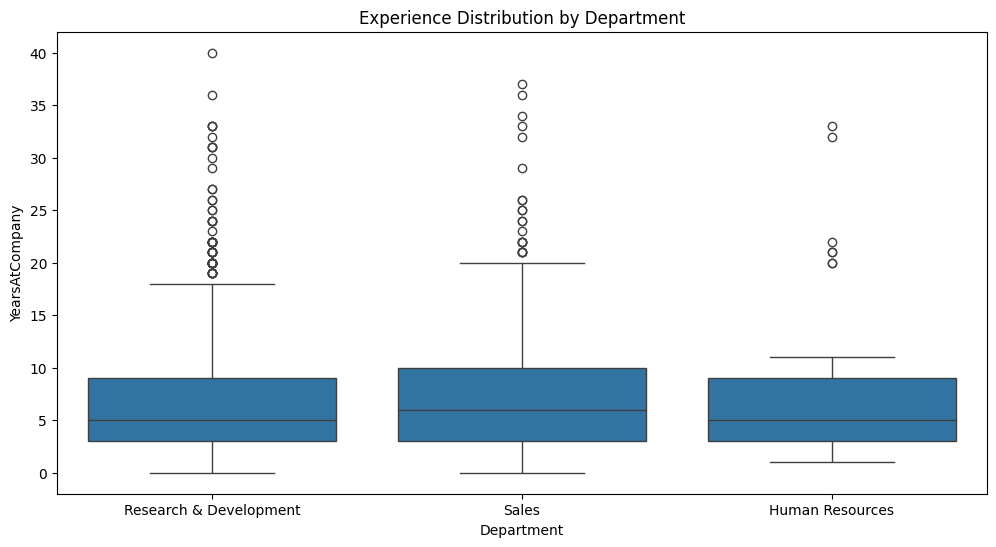

Boxplot saved as 'experience_boxplot.png'


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='YearsAtCompany', data=df)
plt.title('Experience Distribution by Department')
plt.savefig('experience_boxplot.png')
plt.show()

print("Boxplot saved as 'experience_boxplot.png'")

#Q4: Which feature has the highest standard deviation in the dataset?


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
std_devs = df[numeric_columns].std()
highest_std_feature = std_devs.idxmax()
highest_std_value = std_devs.max()

print(f"Feature with highest standard deviation: {highest_std_feature}")
print(f"Standard deviation value: {highest_std_value}")

Feature with highest standard deviation: MonthlyRate
Standard deviation value: 7112.0568016419575


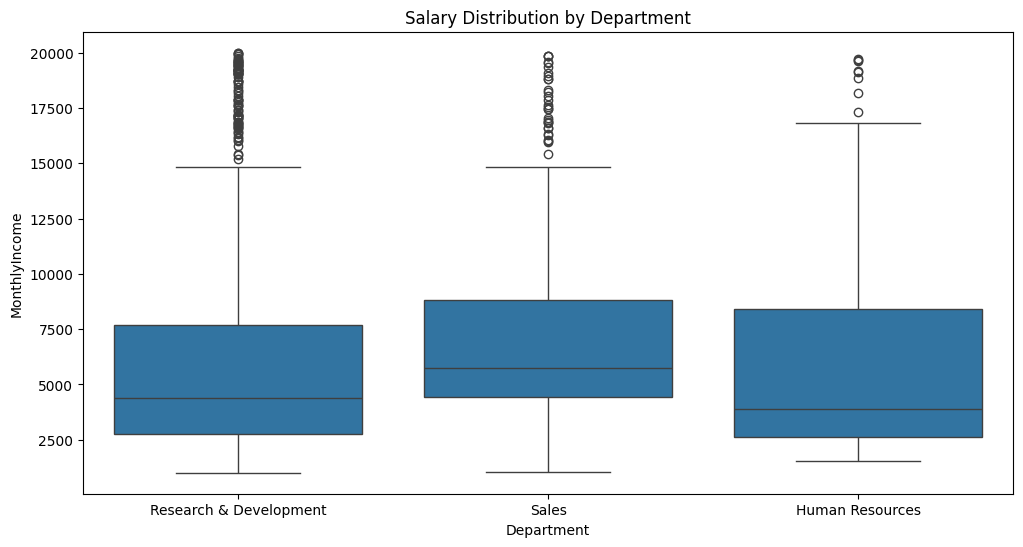

Salary distribution boxplot saved as 'salary_boxplot.png'


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
plt.title('Salary Distribution by Department')
plt.savefig('salary_boxplot.png')
plt.show()

print("Salary distribution boxplot saved as 'salary_boxplot.png'")

#Titanic Atrributes , Customer Segmentation

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
print("Available columns:", data.columns.tolist())

Available columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
print("\nBasic statistics of the dataset:")
print(data.describe(include='all'))


Basic statistics of the dataset:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibS

In [ ]:

grouped_data = data.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
print("\nGrouped data (Pclass, Sex, Survived):")
print(grouped_data)


Grouped data (Pclass, Sex, Survived):
Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47


<Figure size 1000x600 with 0 Axes>

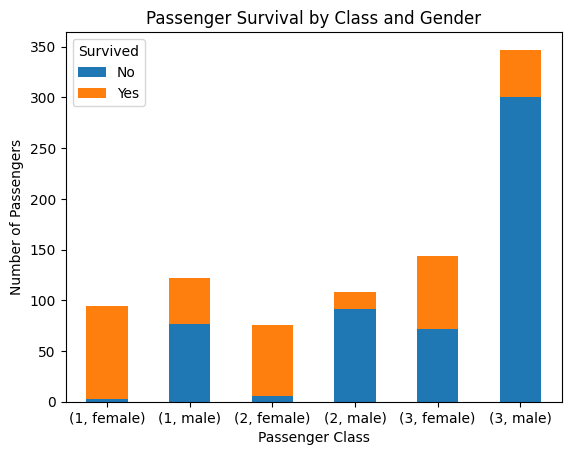

In [ ]:
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Passenger Survival by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

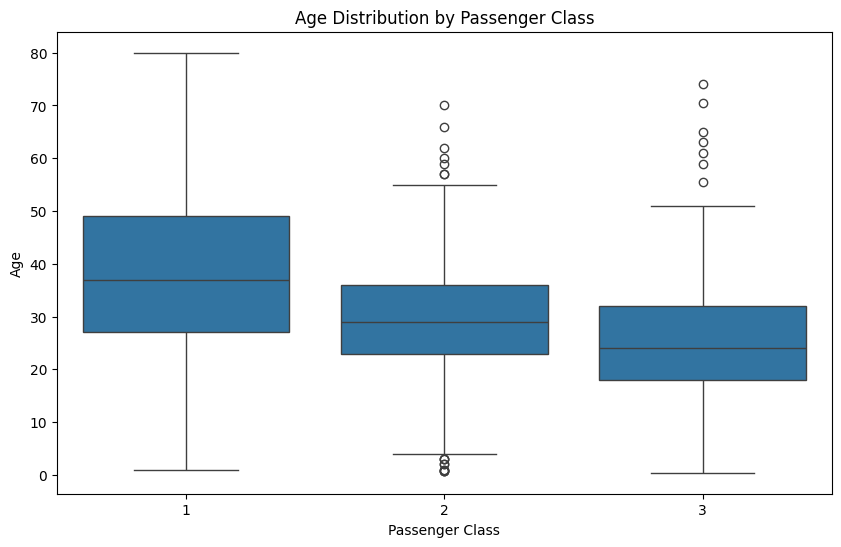

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

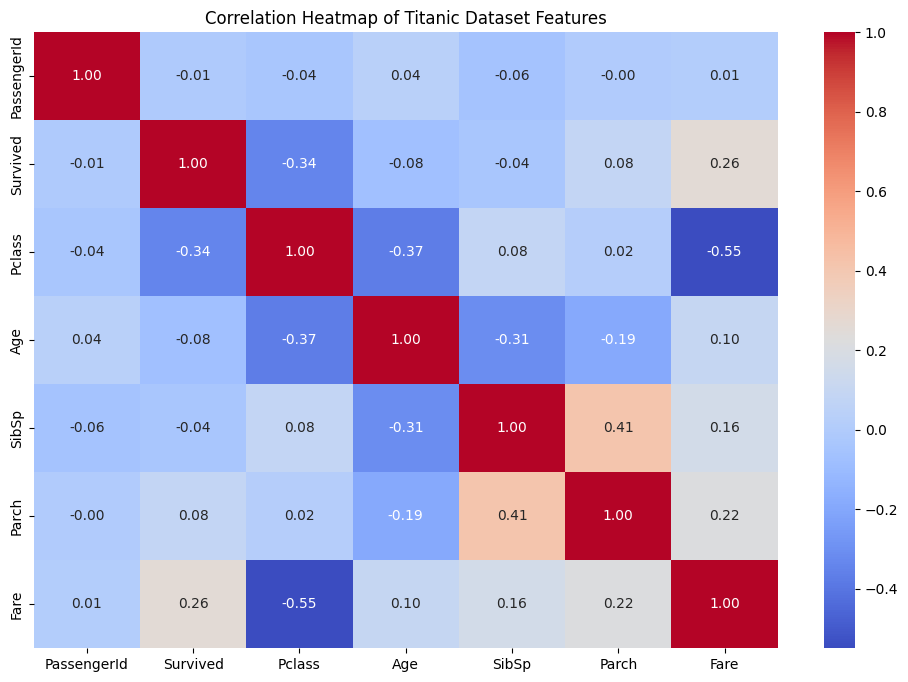

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['Name','Sex','Ticket','Cabin','Embarked']).corr(), annot=True, fmt=".2f", cmap='coolwarm') # Drop non-numerical columns
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()